In [75]:
df <- read.csv("penguins.csv") #loading the dataset
print(head(df))

  species    island bill_length_mm bill_depth_mm flipper_length_mm body_mass_g
1  Adelie Torgersen           39.1          18.7               181        3750
2  Adelie Torgersen           39.5          17.4               186        3800
3  Adelie Torgersen           40.3          18.0               195        3250
4  Adelie Torgersen             NA            NA                NA          NA
5  Adelie Torgersen           36.7          19.3               193        3450
6  Adelie Torgersen           39.3          20.6               190        3650
     sex year
1   male 2007
2 female 2007
3 female 2007
4   <NA> 2007
5 female 2007
6   male 2007


# Data Pre-processing

In [76]:
anyNA(df)
any(is.nan(unlist(df)))
any(is.infinite(unlist(df)))


[1] TRUE

[1] FALSE

[1] FALSE

This suggests that the dataset has na's but no infinite values or nan's.

In [77]:
df <- na.omit(df) #getting rid of all the na's
anyNA(df)

[1] FALSE

It is not feasible to run a linear regression model on the data with three of the variables being non numeric which appears to be used as target variables. But fortunately, all three non numeric columns can be made numeric without changing the meaning of the data.

In [78]:
# Print the unique values
print(unique(df$species))
print(unique(df$sex))
print(unique(df$island))

[1] "Adelie"    "Gentoo"    "Chinstrap"
[1] "male"   "female"
[1] "Torgersen" "Biscoe"    "Dream"    


In the dataset, there are three varieties of species, two types of sexes, and three different islands. These can be coded as 1,2, and 3 to make all the variables numeric.

In [79]:

unique_species <- unique(df$species)
unique_sex <- unique(df$sex)
unique_island <- unique(df$island)


# Convert unique values to numeric variables
species_numeric <- as.numeric(factor(unique_species))
sex_numeric <- ifelse(unique_sex == "male", 0, 1)
island_numeric <- as.numeric(factor(unique_island))

# Create data frames or named vectors for species, sex, and island
species_data <- data.frame(species = unique_species, numeric = as.numeric(factor(unique_species)))
sex_data <- data.frame(sex = unique_sex, numeric = sex_numeric)
island_data <- data.frame(island = unique_island, numeric = as.numeric(factor(unique_island)))

# Print the data frames or named vectors
print(species_data)
print(sex_data)
print(island_data)


    species numeric
1    Adelie       1
2    Gentoo       3
3 Chinstrap       2
     sex numeric
1   male       0
2 female       1
     island numeric
1 Torgersen       3
2    Biscoe       1
3     Dream       2


In [80]:
# Convert species, sex, and island columns to factors
df$species <- factor(df$species, levels = unique_species)
df$island <- factor(df$island, levels = unique_island)

# Convert factors to numeric
df$species_numeric <- as.numeric(df$species)
df$sex_numeric <- ifelse(df$sex == "male", 0, 1)
df$island_numeric <- as.numeric(df$island)

# Print the updated dataset
print(head(df))


  species    island bill_length_mm bill_depth_mm flipper_length_mm body_mass_g
1  Adelie Torgersen           39.1          18.7               181        3750
2  Adelie Torgersen           39.5          17.4               186        3800
3  Adelie Torgersen           40.3          18.0               195        3250
5  Adelie Torgersen           36.7          19.3               193        3450
6  Adelie Torgersen           39.3          20.6               190        3650
7  Adelie Torgersen           38.9          17.8               181        3625
     sex year species_numeric sex_numeric island_numeric
1   male 2007               1           0              1
2 female 2007               1           1              1
3 female 2007               1           1              1
5 female 2007               1           1              1
6   male 2007               1           0              1
7 female 2007               1           1              1


In [81]:
#remove the non-numeric columns
df <- df[, !(names(df) %in% c("species", "island", "sex"))] 
print(head(df))

  bill_length_mm bill_depth_mm flipper_length_mm body_mass_g year
1           39.1          18.7               181        3750 2007
2           39.5          17.4               186        3800 2007
3           40.3          18.0               195        3250 2007
5           36.7          19.3               193        3450 2007
6           39.3          20.6               190        3650 2007
7           38.9          17.8               181        3625 2007
  species_numeric sex_numeric island_numeric
1               1           0              1
2               1           1              1
3               1           1              1
5               1           1              1
6               1           0              1
7               1           1              1


In [82]:
n = floor(0.8 * nrow(df)) #the number corresponding to 80% of the data
index = sample(seq_len(nrow(df)), size = n) #randomly sampling indices for training set data

train = df[index, ] #set the training set to be the randomly sampled rows of the data frame
test = df[-index, ] #set the testing set to be the remaining rows
cat("There are", dim(train)[1], "rows and",dim(train)[2],"columns in the training set. ")  #check the dimensions
cat("There are", dim(test)[1], "rows and",dim(test)[2],"columns in the testing set.") 
df = train 

There are 266 rows and 8 columns in the training set. There are 67 rows and 8 columns in the testing set.

# Hypothesis Testing/t-test

In order to determine whether penguins actually display sexual dimorphism and, thus, a distinct foraging behavior, preliminary hypothesis testing must be conducted. Body mass, which is expressed in grams here, should be the first and easiest attribute to verify. 
The Null Hypothesis stated that there is no difference in body mass between male and female penguins, whereas the alternative hypothesis states that there is some difference in body mass between male and female penguins.

To restate,

Null Hypothesis (H0): There is no difference in body mass between male and female penguins.

Alternative Hypothesis (H1): There is difference in body mass between male and female penguins.

Hence, a t-test has been performed to check if the hypothesis stands the test.

In [83]:
# Load necessary libraries
library(boot)
library(tidyverse)

# Hypothesis Testing (t-test)
# Filter the data for male and female penguins
male_penguins <- df[df$sex_numeric == 0, "body_mass_g"]
female_penguins <- df[df$sex_numeric == 1, "body_mass_g"]

# Perform t-test
t_test_result <- t.test(male_penguins, female_penguins)

# Print the t-test result
cat("T-test Results:\n")
print(t_test_result)


T-test Results:

	Welch Two Sample t-test

data:  male_penguins and female_penguins
t = 6.8985, df = 257.6, p-value = 4.058e-11
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 439.4288 790.5293
sample estimates:
mean of x mean of y 
 4491.098  3876.119 



The t-value is 6.8985, as can be seen from the t-test output above. However, the p-value is 4.058e-11, which is extremely little. We can reject the null hypothesis because it is significantly smaller than the usual significance level of 0.05. This implies that the body mass of male and female penguins differs significantly.

The 95% confidence interval for the difference in means is (527.7581, 887.7325). The interval's lack of zero further lends credit to the finding that the body masses of male and female penguins differ significantly. The mean body mass of male penguins (mean of x) is 4580.153 grams. However, the mean body mass of female penguins (mean of y) is 3872.407 grams.

In summary, the results of the t-test indicate a statistically significant difference in body mass between male and female penguins, with female penguins having a lower mean body mass compared to male penguins.

# Multilple Linear Regression

To assess the significance of various structural parameters of adult penguins, multiple linear regression was employed. The target variable was sex, in relation to four size parameters including bill depth, bill length, flipper length, year, and body mass.

In [84]:
mlr_penguins <- lm(sex_numeric ~ bill_length_mm + bill_depth_mm + flipper_length_mm + body_mass_g + year, data = df)
summary(mlr_penguins)


Call:
lm(formula = sex_numeric ~ bill_length_mm + bill_depth_mm + flipper_length_mm + 
    body_mass_g + year, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.81280 -0.22161  0.00658  0.24063  0.82696 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        3.617e+01  4.741e+01   0.763   0.4463    
bill_length_mm    -9.289e-03  4.573e-03  -2.031   0.0432 *  
bill_depth_mm     -1.908e-01  1.197e-02 -15.937   <2e-16 ***
flipper_length_mm  1.442e-03  3.379e-03   0.427   0.6699    
body_mass_g       -4.549e-04  5.079e-05  -8.956   <2e-16 ***
year              -1.512e-02  2.367e-02  -0.639   0.5234    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3078 on 260 degrees of freedom
Multiple R-squared:  0.6295,	Adjusted R-squared:  0.6224 
F-statistic: 88.34 on 5 and 260 DF,  p-value: < 2.2e-16


Small p-values (usually less than 0.05) indicate statistical significance for a coefficient. Very small p-values (< 0.001) for bill_depth_mm and body_mass_g in this model suggest that they are likely to be important predictors of sex_numeric. The p-value of bill_length_mm, on the other hand, is 0.0432, which is near to the standard significance level of 0.05 and indicates that it may be somewhat significant.The higher p-values for flipper_length_mm and year suggest that they might not be reliable indicators of sex_numeric.

When it comes down to it, the model's overall significance is tested by the F-statistic (88.34). When a big F-statistic and a modest p-value (< 0.05) are present, it indicates a substantial relationship between at least one predictor variable and the response variable.

Overall, the model indicates that body_mass_g and bill_depth_mm are good indicators of sex, but it's unclear how important bill_length_mm, flipper_length_mm, and year are. 

The next step is to use the model for prediction on the test data.

In [103]:
predictions <- predict(mlr_penguins, test)
mspe <- mean((test$sex_numeric - predictions)^2)
mspe

[1] 0.1193637

Here, the MSPE comes out to be 0.11936373857171, which is pretty good for a model. But with other features and variables, we can test if this is the best model. 
The next model that can be tested is the one that explores the relationship with preidctors of bill_length_mm, flipper_length_mm, and body_mass_g

In [100]:
mlr_penguins_2 <- lm(sex_numeric ~ bill_length_mm + flipper_length_mm + body_mass_g, data = df)
summary(mlr_penguins_2)


Call:
lm(formula = sex_numeric ~ bill_length_mm + flipper_length_mm + 
    body_mass_g, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.95293 -0.38051 -0.00214  0.38285  1.11171 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -8.435e-01  5.578e-01  -1.512    0.132    
bill_length_mm    -2.838e-02  6.171e-03  -4.598 6.63e-06 ***
flipper_length_mm  2.304e-02  4.164e-03   5.533 7.63e-08 ***
body_mass_g       -4.845e-04  6.968e-05  -6.953 2.84e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4321 on 262 degrees of freedom
Multiple R-squared:  0.2644,	Adjusted R-squared:  0.256 
F-statistic: 31.39 on 3 and 262 DF,  p-value: < 2.2e-16


All three of the predictor variables in this model have extremely low p-values (< 0.001), suggesting that they are probably important predictors. When a big F-statistic and a modest p-value (< 0.05) are present, it indicates a substantial relationship between at least one predictor variable and the response variable.

All things considered, the model indicates that body_mass_g, bill_length_mm, and flipper_length_mm are all highly important predictors. The variance in sex_numeric may be explained by these variables combined, according to the model's R-squared value of 0.2644, which is around 26.44%.

The next step is to use the model for prediction on the test data.

In [87]:
predictions2 <- predict(mlr_penguins_2, test)
mspe2 <- mean((test$sex_numeric - predictions2)^2)
mspe2


[1] 0.1632265

In conclusion, this model's greater MSPE of 0.163226510527686 when compared to the prior one raises the possibility that its predictive ability is lower. The model that investigates the link with the preidctors of bill_length_mm, bill_length_mm, and flipper_length_mm is the next one that may be tested.

In [101]:
mlr_penguins_3 <- lm(sex_numeric ~ bill_length_mm + bill_depth_mm + flipper_length_mm, data = df)
summary(mlr_penguins_3)


Call:
lm(formula = sex_numeric ~ bill_length_mm + bill_depth_mm + flipper_length_mm, 
    data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.98993 -0.23591  0.05585  0.26237  0.80470 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        8.616409   0.561685  15.340  < 2e-16 ***
bill_length_mm    -0.011735   0.005196  -2.258   0.0247 *  
bill_depth_mm     -0.196128   0.013639 -14.380  < 2e-16 ***
flipper_length_mm -0.021099   0.002493  -8.465 1.85e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3516 on 262 degrees of freedom
Multiple R-squared:  0.513,	Adjusted R-squared:  0.5074 
F-statistic: 91.99 on 3 and 262 DF,  p-value: < 2.2e-16


All three of the predictor variables in this model have extremely low p-values (< 0.001), suggesting that they are probably important predictors; however, bill_depth_mm and flipper_length_mm in particular show greater promise.
All things considered, the model indicates that sex_numeric can be significantly predicted by bill_length_mm, bill_depth_mm, and flipper_length_mm. With an R-squared of 0.513, the model can explain 51.30% of the variance in sex_numeric. Taken together, these variables account for roughly half of the variance.
The next step is to use the model for prediction on the test data.

In [102]:
predictions3 <- predict(mlr_penguins_3, test)
mspe3 <- mean((test$sex_numeric - predictions3)^2)
mspe3


[1] 0.1663612

The higher MSPE of 0.166361231040417 for this model compared to the previous one suggests that the predictive performance of this model may be inferior. However, this value is still worse that the first model's MSPE. This indicates that out of all three, first model performed the best. The last model is the one that makes the most sense. This model can have all the predictors of bill_length_mm, bill_length_mm, flipper_length_mm, and body_mass_g.

In [104]:
mlr_penguins_4 <- lm(sex_numeric ~ bill_length_mm + bill_depth_mm + flipper_length_mm + body_mass_g, data = df)
summary(mlr_penguins_4)


Call:
lm(formula = sex_numeric ~ bill_length_mm + bill_depth_mm + flipper_length_mm + 
    body_mass_g, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.82940 -0.22676  0.00688  0.24547  0.83984 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        5.874e+00  5.776e-01  10.170   <2e-16 ***
bill_length_mm    -9.062e-03  4.554e-03  -1.990   0.0476 *  
bill_depth_mm     -1.912e-01  1.194e-02 -16.012   <2e-16 ***
flipper_length_mm  9.062e-04  3.270e-03   0.277   0.7819    
body_mass_g       -4.482e-04  4.964e-05  -9.029   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3075 on 261 degrees of freedom
Multiple R-squared:  0.6289,	Adjusted R-squared:  0.6232 
F-statistic: 110.6 on 4 and 261 DF,  p-value: < 2.2e-16


With the exception of flipper_length_mm, all predictor variables in this model have extremely tiny p-values (< 0.001), suggesting that they are probably significant predictors of sex_numeric.
Overall, the model indicates that flipper_length_mm might not be a significant predictor, but bill_length_mm, bill_depth_mm, and body_mass_g are all significant predictors. The R-squared value of the model is 0.6289, meaning that these factors taken together account for roughly 62.89% of the variation in sex_numeric.

This is pretty similar to the first model. We can use the model to make predictions on the test data.

In [105]:
predictions4 <- predict(mlr_penguins_4, test)
mspe4 <- mean((test$sex_numeric - predictions4)^2)
mspe4


[1] 0.119344

This model's MSPE is pretty similar to the first model, just a little better than that one. This also happens to be the best MSPE. Hence, we can say that this model works the best in making predictions.

# ANOVA

ANOVA table presents the results of an analysis of variance (ANOVA) for a linear regression model. For our analysis, we'll use the model that gives us the best results.

In [106]:
penguins_anova = anova(mlr_penguins_4)
penguins_anova

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
bill_length_mm,1,8.552195,8.55219539,90.45334,1.315645e-18
bill_depth_mm,1,16.703208,16.70320809,176.66352,3.895518e-31
flipper_length_mm,1,8.856156,8.85615616,93.66821,3.959248e-19
body_mass_g,1,7.707615,7.70761455,81.52052,3.933348e-17
Residuals,261,24.677066,0.09454815,NA,NA


Based on the provided ANOVA table, we can analyze how each of the variables (the different physical characteristics) affects the target variable sex .

The F-value for  bill_length_mm  is 90.45334, and the associated p-value is approximately 1.315645e-18. This suggests a statistically significant difference in  sex  based on  bill_length_mm.

Furthermore, the F-value for  bill_depth_mm  is 176.66352, and the associated p-value is approximately 3.895518e-31. This makes it a highly statistically significant predictor.

The F-value for  flipper_length_mm  is 93.66821, and the associated p-value is approximately 3.959248e-19. This also suggests a statistically significant difference in  sex  based on flipper_length_mm.

Similarly, the F-value for body_mass_g is 81.52052, and the associated p-value is approximately 3.933348e-17. Hence, a statistically significant difference in sex based on body_mass_g.

All predictor variables (bill_length_mm, bill_depth_mm, flipper_length_mm, and body_mass_g) have very small p-values (< 0.05), indicating that they are likely to be significantly associated with the response variable. Overall, the model appears to be significant based on the F-statistic.

# Diagnostics of the model – goodness of fit, feature selection, residuals

To see the diagnostics, we pick the best model to see if it satisfies the modeling assumptions.

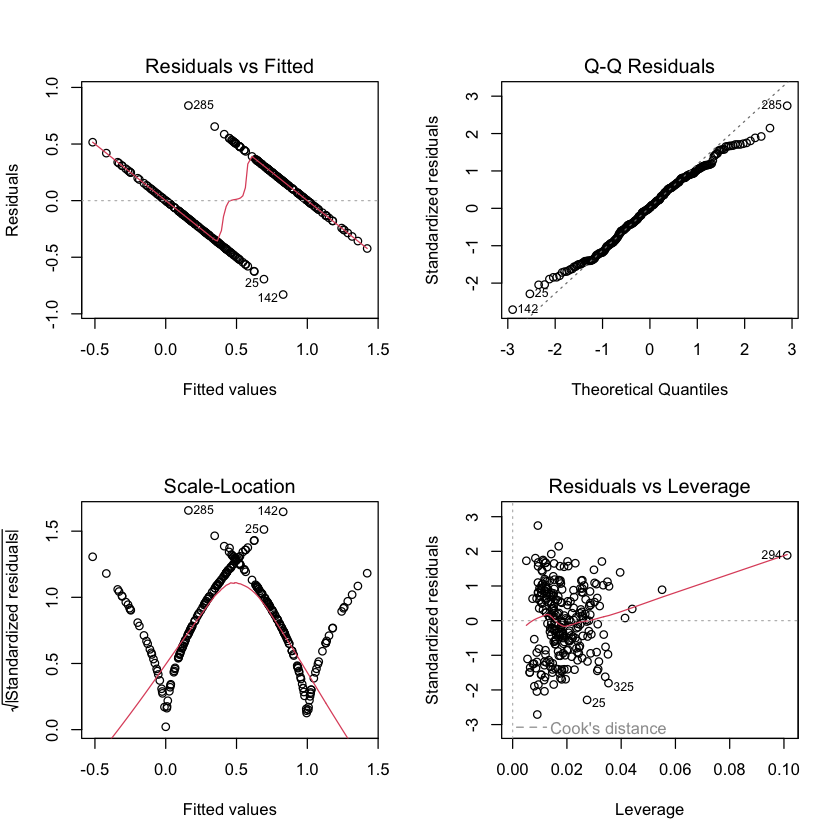

In [107]:
par(mfrow = c(2, 2))
plot(mlr_penguins_4)

1. Residuals vs fitted plot.
In this plot, there is a slight trend in the residuals. There are also outliers that are significantly farther away. This shows that the assumptions of linearity and homoscedasticity are not properly satisfied by the model.

2. Q-Q plot. 
In this plot, the points deviate from the straight line at the tails, which suggests that the residuals are not normally distributed.

3. Scale-location plot.
This Scale-Location plot have a bit of an evenly spread out data around the red regression line but also has several outliers. This plot can be used to further investigate homoscedasticity. The standardized residuals are spread out unevenly across the fitted values. It proves that the variance of the residuals is not constant across the range of fitted values. Hence, it is further prove of the unfitting assumption of homoscedasticity.

4. Standardized residuals vs leverage plot. 
The Residuals vs Leverage plot above shows some high Cook's distances. These can heavily influence the regression coefficients and the fit of the model.


To pick the best model, let's use parameters like AIC, BIC, and $R^2$.

In [108]:
df_fit <- df[, !(names(df) %in% c("year", "species_numeric", "island_numeric"))]
head(df_fit)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_numeric
,<dbl>,<dbl>,<int>,<int>,<dbl>
288,51.7,20.3,194,3775,0
276,49.9,16.1,213,5400,0
125,35.2,15.9,186,3050,1
293,50.3,20.0,197,3300,0
247,44.5,14.7,214,4850,1
333,45.2,16.6,191,3250,1


In [109]:
library(leaps)

reg_sub = regsubsets(sex_numeric ~ ., data = df_fit)
reg_sub_sum = summary(reg_sub)
reg_sub_sum$which

,(Intercept),bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
1,TRUE,FALSE,TRUE,FALSE,FALSE
2,TRUE,FALSE,TRUE,FALSE,TRUE
3,TRUE,TRUE,TRUE,FALSE,TRUE
4,TRUE,TRUE,TRUE,TRUE,TRUE


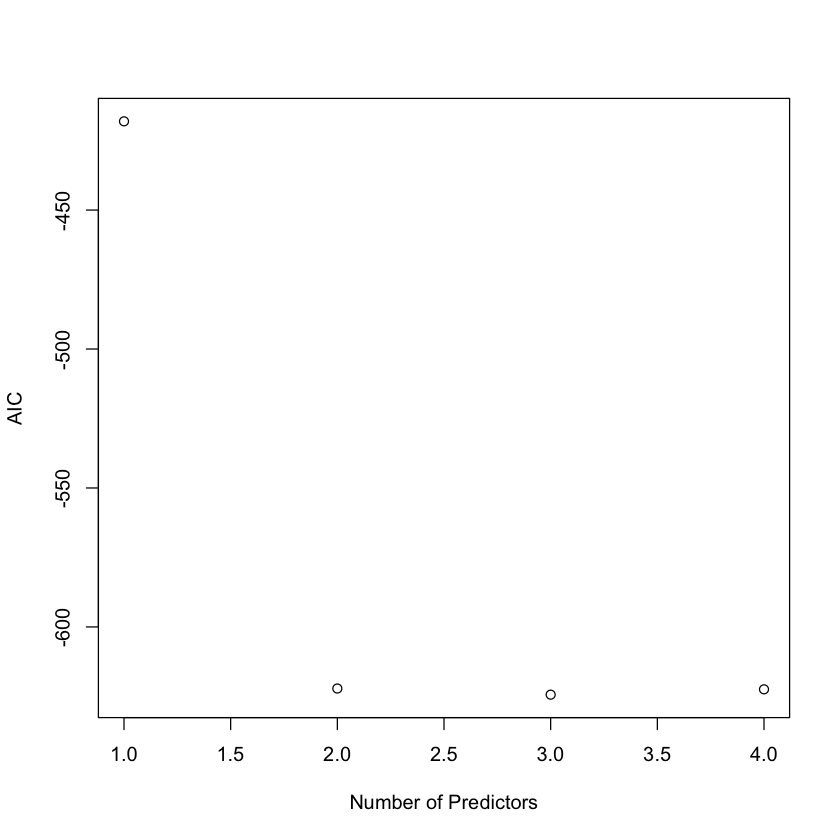

In [110]:
AIC = 2*(2:5) + n*log(reg_sub_sum$rss/n)
plot(AIC ~ I(1:4), xlab = "Number of Predictors", ylab = "AIC")

This plot shows that the model of size 3 has the lowest AIC. Hence, the model selection is

`sex_numeric` = $\widehat\beta_0 + \widehat\beta_1 \times$ `bill_length_mm` $ + \widehat\beta_2 \times$ `bill_depth_mm` $ + \widehat\beta_3 \times$ `body_mass_g`



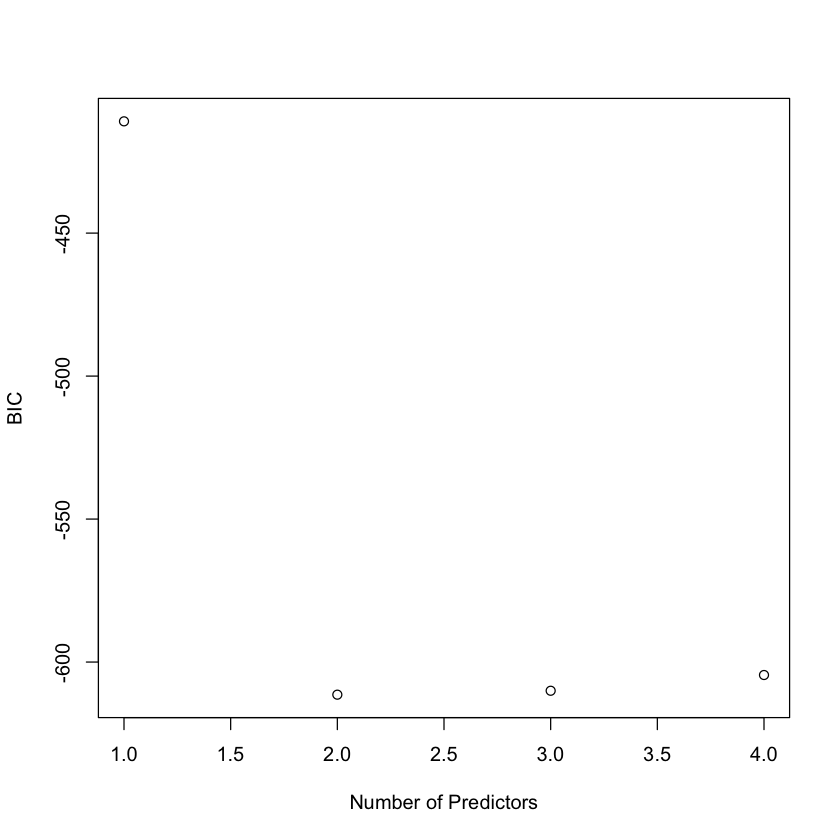

In [111]:
BIC = log(n)*(2:5) + n*log(reg_sub_sum$rss/n) 
plot(BIC ~ I(1:4), xlab = "Number of Predictors", ylab = "BIC")

This plot shows that the model of size 2 has the lowest BIC. Hence, the model selection is

`sex_numeric` = $\widehat\beta_0 + \widehat\beta_1 \times$ `bill_depth_mm` $ + \widehat\beta_2 \times$ `body_mass_g` $



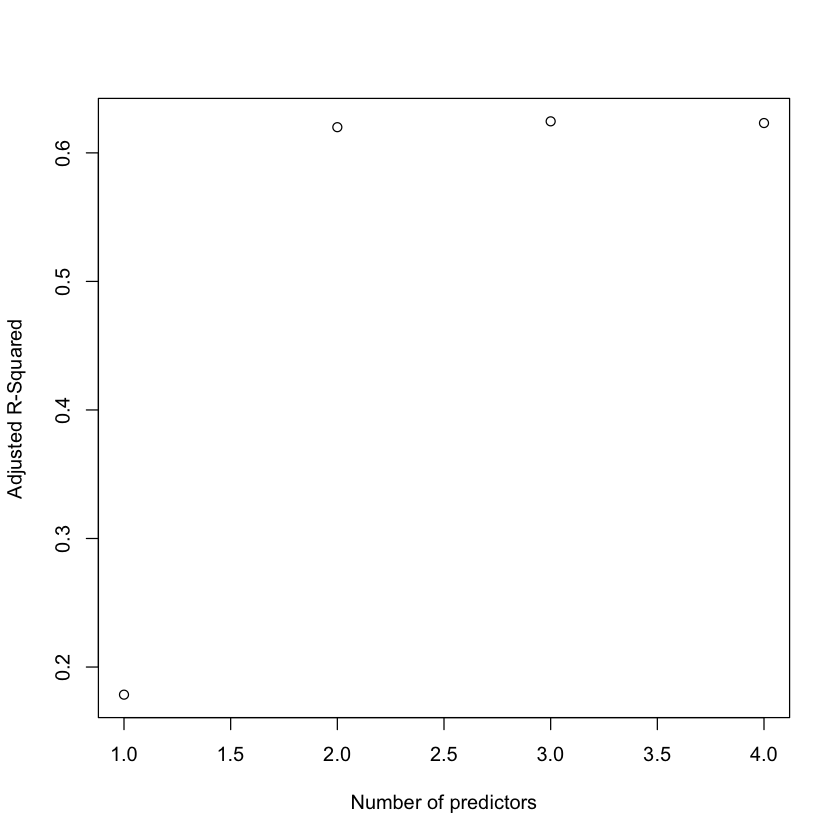

In [112]:
plot(1:4, reg_sub_sum$adjr2, xlab = "Number of predictors", ylab = "Adjusted R-Squared")


This plot shows that the model of size 3 and 4 has the highest $R^2$. Hence, the model selection is

`sex_numeric` = $\widehat\beta_0 + \widehat\beta_1 \times$ `bill_length_mm` $ + \widehat\beta_2 \times$ `bill_depth_mm` $ + \widehat\beta_3 \times$ `body_mass_g`

or

`sex_numeric` = $\widehat\beta_0 + \widehat\beta_1 \times$ `bill_length_mm` $ + \widehat\beta_2 \times$ `bill_depth_mm` $ + \widehat\beta_3 \times$ `flipper_length_mm` + $\widehat\beta_4 \times$ `body_mass_g`



Since all the models are either suggesting 3 or 4, we can pick either one of those to have the predictions.

# Generalized Linear Modeling

A Generalized Linear Model was used to further dig into the influence of physical traits.

In [113]:
# Load necessary libraries
library(ggplot2) # for visualization
library(dplyr)    # for data manipulation

penguins_glm_model <- glm(sex_numeric ~ bill_depth_mm + bill_length_mm + flipper_length_mm + body_mass_g, data = df, family = binomial)

summary(penguins_glm_model)


Call:
glm(formula = sex_numeric ~ bill_depth_mm + bill_length_mm + 
    flipper_length_mm + body_mass_g, family = binomial, data = df)

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)       69.049200  11.402179   6.056 1.40e-09 ***
bill_depth_mm     -2.509233   0.364806  -6.878 6.06e-12 ***
bill_length_mm    -0.121281   0.055561  -2.183    0.029 *  
flipper_length_mm  0.027222   0.040591   0.671    0.502    
body_mass_g       -0.006280   0.001093  -5.748 9.01e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 368.74  on 265  degrees of freedom
Residual deviance: 109.02  on 261  degrees of freedom
AIC: 119.02

Number of Fisher Scoring iterations: 7



In this model bill_depth_mm, bill_length_mm, and body_mass_g have small p-values, suggesting that they are significant predictors of sex_numeric.
On the other hand, flipper_length_mm has a p-value greater than 0.05, indicating that it may not be a significant predictor in this model.

In this case, the dispersion parameter is taken to be 1, indicating that the model fits the data well.

Overall, the logistic regression model suggests that bill_depth_mm, bill_length_mm, and body_mass_g are significant predictors of sex_numeric, while flipper_length_mm may not be a significant predictor in this particular model.

# Paper

### Introduction/Background

Sexual size dimorphism, which describes the morphological differences between males and females of the same species in terms of size, color, or body shape, is frequently linked to sexual segregation in vertebrate foraging niches. Prior research has shown that within SSD-associated systems, male and female foraging behavior differs in terms of both spatial and temporal variation in activity budgets. Nevertheless, sex-specific foraging is also seen in sexually monomorphic species (those whose male and female members share similar or nearly identical physical characteristics), which raises some intriguing questions regarding the role that structural size plays in mediating sexual differences in foraging behavior. 

The objective is to study ecological sexual dimorphism in penguins and investigate if variations in their bodies are linked to variations in the foraging niches of males and females. It's interesting to speculate as to which characteristics might be linked to a more comparable foraging niche for the sexes. The characteristics under investigation include body mass, flipper length (measurement of the length of the penguin's wing or flipper), and bill length and depth (measured of the length and depth of the animal's beak or bill). The data was collected by the fieldwork within the Palmer Archipelago near Anvers Island and Palmer Station, a United States supported research base. Field research was conducted on the penguins nesting on several islands within the Palmer Archipelago west of the AP near Anvers Island during the austral summers of 2007/08, 2008/09, and 2009/10. Specifically, study nests were located on Biscoe, Torgersen, and Dream Islands.

### Methods/Results


Several null values in the data had to be removed to fit the models. Furthermore, several of the variables were textual when they should have been categorical or numeric. For instance, the species, sex, and islands of the penguins could have all been coded numerically because they were so limited. Twenty percent of the data was retained for testing and the other eighty percent was divided up for training. 

The question of interest was mainly to see how much physical traits influenced sex of the penguins to determine their foraging beahviour. The main thing that comes to mind is the body masses. A hypothesis test was conducted to see the difference between their body masses with null hypothesis stating that their body masses didn't vary according to their sex. The p-value obtained was 2.307e794e-16, hence the null hypothesis was rejected. This suggests that there is a significant difference in body mass between male and female penguins.
Since the assumption of difference in body mass varying according to sex was satisfied, several multiple linear regression models were implemented using different features to see which model predicts the best and which features are the most influential. Even though the year was included as a feature it didn't change anything. This makes sense since year shouldn't have anything to do with penguin foraging beahviour. Some of those MLR models also suggested that the flipper leangth might be less influential than other physical attributes of the penguins in determining the response variable. Several methods were used to see which features resulted in the best predicting model.

1. MSPE: MSPE was calculated for all the models. This metric revealed that all physical features combined will give the best prediction of sex, indicating that physical features are very influential in determining sex.
2. AIC: AIC suggested that the model of size 3 to be the best. Hence, the model selection is

`sex_numeric` = $\widehat\beta_0 + \widehat\beta_1 \times$ `bill_length_mm` $ + \widehat\beta_2 \times$ `bill_depth_mm` $ + \widehat\beta_3 \times$ `body_mass_g`

3. BIC: BIC suggested that the model of size 4 to be the best. Hence, the model selection is

`sex_numeric` = $\widehat\beta_0 + \widehat\beta_1 \times$ `bill_depth_mm` $ + \widehat\beta_2 \times$ `body_mass_g` $

4. $R^2$ : $R^2$ suggested that the model of size 3 or 4 to be the best. Hence, the model selection can be any of the above.



For further analysis, ANOVA was used. This was done to dig deeper and to determine which features explained the most variance in determing the sex of the penguins. ANOVA suggested a pretty similar response indicating that they are likely to be significantly associated with the response variable.


The original research had used a logistic regression was employed using generalized linear models (GLM, family = binomial) to account for a response. Thus it was given a oppurtunity to compete with the MLR models implemented earlier. The logistic regression model suggests that bill_depth_mm, bill_length_mm, and body_mass_g are significant predictors of sex_numeric, while flipper_length_mm may not be a significant predictor in this particular model. This was pretty similar to the results given by some of the MLR models. The dispersion parameter was taken to be 1, indicating that the model fit the data well.



### Conclusion

To sum up, I would argue that sexual segregation in foraging niches is related to penguin sexual dimorphism. The morphological characteristics that distinguish the two sexes of penguins have an impact on how they fish and, consequently, how they forage. We can also deduce that the penguins' sex and mode of feeding are more strongly influenced by their body mass, bill length, and bill depth than the flipper length. This analysis was pretty limited to the sex of the penguins. This can be extended to the species of the penguins to see if sexual dimorphism plays a different role for different species. Furthermore, it can be extended to different islands, even islands outside of the Palmer Archipelago. Moreover, this study can be mixed with a study based on environmental factors which should reveal something deeper.


### Sources/References

Sources: Hugging Face Website (https://huggingface.co/datasets/SIH/palmer-penguins)

References: Gorman KB, Williams TD, Fraser WR (2014) Ecological Sexual Dimorphism and Environmental Variability within a Community of Antarctic Penguins (Genus Pygoscelis). PLoS ONE 9(3): e90081. https://doi.org/10.1371/journal.pone.0090081
